# Bike modeling system

### Exercise 3

Wrap the code in the chapter in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `TimeSeries` object to hold the results.

2. Use a for loop to run `step` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.

3. After each step, it should save the number of bikes at Olin in the `TimeSeries`.

4. After the for loop, it should plot the results and

5. Decorate the axes.

To test your function:

1. Create a `State` object with the initial state of the system.

2. Call `run_simulation` with parameters `p1=0.3`, `p2=0.2`, and `num_steps=60`.

In [2]:
import modsim

In [35]:
def bike_to_wellesley(init_state):
    #print('Moving a bike to Wellesley')
    init_state.olin -= 1
    init_state.wellesley += 1


def bike_to_olin(init_state):
    #print('Moving a bike to Olin')
    init_state.wellesley -= 1
    init_state.olin += 1


def step(init_state, p1=0.5, p2=0.5):
    if modsim.flip(p1):
        bike_to_wellesley(init_state)
    
    if modsim.flip(p2):
        bike_to_olin(init_state)

In [41]:
def run_simulation(init_state, p1=0.5, p2=0.5, num_steps=100):

    results = modsim.TimeSeries() # results container
    _init_state = init_state.copy()
    
    for i in range(num_steps):
        #print(i)
        step(init_state, p1=p1, p2=p2)
        results[i+1] = init_state.olin
    
    results.plot()

    modsim.decorate(
        title='Olin-Wellesley Bikeshare',
        xlabel='Time step (min)', 
        ylabel='Number of bikes',
    )

    return results, _init_state, init_state


In [44]:
bikeshare_1 = modsim.State(olin=10, wellesley=2)
print(bikeshare_1)

olin         10
wellesley     2
dtype: int64


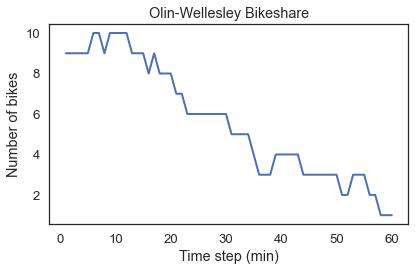

In [45]:
results, istate, cstate = run_simulation(bikeshare_1, p1=0.3, p2=0.2, num_steps=60)

In [48]:
cstate

,values
olin,1
wellesley,11


In [49]:
bikeshare_1

,values
olin,1
wellesley,11
